# Neural Networks (For Real This Time)

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

<br>

First order of business: setting all our tensors to run on the GPU. So far, we've had to manually assign every single tensor to the GPU. Well not anymore!

In [2]:
# cofigure device which we can assign to all tensors
device = torch.device('cuda')

device

device(type='cuda')

---
## The Data and Parameters

<br>

For our first official neural network, we'll be training on the MNIST handwritten digit data set, the "hello, world!" of Machine Learning Libraries.

In [24]:
# input shape of MNIST digits are 28 x 28 = 784 pixels in total
input_size = 784

# we'll specify the number of hidden units in the hidden layer
hidden_size = 100

# the output should consist of 10 classes: 0 - 9
output_size = 10

# set batch size
batch_size=100

In [6]:
# set up train data for MNIST
train_dataset = torchvision.datasets.MNIST(
                    root='./data', # where the data is stored
                    train=True, # whether to load training set or test set
                    transform = transforms.ToTensor(), # preprocess each image into a tensor
                    download=True # if missing, will download dataset
                )
# setup test data
test_dataset = torchvision.datasets.MNIST(
                    root='./data', # where the data is stored
                    train=False, # whether to load training set or test set
                    transform = transforms.ToTensor() # preprocess each image into a tensor; Note that this also scales the 0-255 pixel values to 0 - 1, so very nice!
                )

# build dataloader for training set
train_loader = torch.utils.data.DataLoader( dataset = train_dataset, batch_size = batch_size, shuffle=True)

# build dataloader for test data
test_loader = torch.utils.data.DataLoader( dataset = test_dataset, batch_size = batch_size, shuffle=True)

In [9]:
# pick out a batch from the training loader
examples = iter(train_loader)
samples, labels = examples.next()

# look at batch dimension info.
## We should see: 100 images x 1 channel x 28 width x 28 height
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [16]:
# the samples variable should contain a batch of images, stored as a matrix
# lets take a look at the first "image"
samples[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0353, 0.3020, 0.9804, 0.9961, 0.9961, 0.0863,

In [21]:
# notice the image is wrapped in an extra layer of brackets.
# this extra level corresponds to the color channel.
# For colored images we would usually see 3 sets of matrices
# But for grayscale we only have 1 channel, hence a redundant set of brackets

# we can extrac the "image" like so
samples[0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0353, 0.3020,
         0.9804, 0.9961, 0.9961, 0.0863, 0.0000, 0.0000

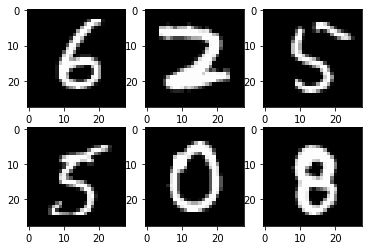

In [23]:
# visualize the images
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
    
plt.show()

---

## The Model

In [46]:
class NeuralNet(nn.Module):
    
    # initialize neural network. We'll pass input size, hidden size, and output size as arguments
    def __init__(self, input_size, hidden_size, output_size):
        # call the super().__init__() method to inherit the super class nn.Module
        super(NeuralNet, self).__init__()
        
        # We set-up components of the network here. This usually includes the different kinds of layers and activation functions
        ### hidden layer 1
        self.hidden1 = nn.Linear(input_size, hidden_size).to(device)
        ### relu activation
        self.relu = nn.ReLU()
        ### output layer
        self.output = nn.Linear(hidden_size, output_size).to(device)
        
    
    # define feed-forward pass
    def forward(self, x):
        # chain together the previous components 
        out = self.hidden1(x)
        out = self.relu(out)
        out = self.output(out)
        return out
    
    

In [54]:
# Instantiate our shiny new neural network
model = NeuralNet(input_size=input_size, hidden_size = hidden_size, output_size=output_size)

# set learning rate
learning_rate = 0.001

# set loss and optimizer

### Since we are doing multiclass classification, we'll need CrossEntropyLoss()
### but remember for the PyTorch version: we don't need to pass a softmax activation in the output layer nor do we need to one-hot encode
criterion = nn.CrossEntropyLoss()

### set optimizer to Adam
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

In [55]:
# Training Loop
n_steps = len(train_loader)

# set number of epochs to train
num_epochs = 10

# build training loop
for epoch in range(num_epochs):
    # recall the train_loader spits out training data in batches
    ### Define training loop over all batches
    for i, (images, labels) in enumerate(train_loader):
        # recall that image shapes are stored as a 1 x 28 x 28 tensor
        # we need to reshape the image to 784 long vector to feed it into the input layer.
        ### Preprocessing inputs
        images = images.reshape(-1, 28*28).to(device)  # specify that this tensor should be on the GPU
        labels = labels.to(device)
        
        # feed-forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backpropagation
        loss.backward()
        
        # descend
        optimizer.step()
        
        # print a console output to monitor training
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, batch {i+1}/{n_steps}, loss = {loss.item():.4f}')
        
    # once all the batches have been processed, the accumulated gradient can be reset for the next epoch run
    optimizer.zero_grad()
    

# check accuracy on test set
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct/n_samples
    
    print(f'accuracy: {acc}')
    

epoch 1 / 10, batch 100/600, loss = 2.8741
epoch 1 / 10, batch 200/600, loss = 1.0155
epoch 1 / 10, batch 300/600, loss = 0.8971
epoch 1 / 10, batch 400/600, loss = 0.6393
epoch 1 / 10, batch 500/600, loss = 0.9247
epoch 1 / 10, batch 600/600, loss = 0.7078
epoch 2 / 10, batch 100/600, loss = 0.8322
epoch 2 / 10, batch 200/600, loss = 0.6101
epoch 2 / 10, batch 300/600, loss = 0.6622
epoch 2 / 10, batch 400/600, loss = 0.9467
epoch 2 / 10, batch 500/600, loss = 0.6634
epoch 2 / 10, batch 600/600, loss = 0.7229
epoch 3 / 10, batch 100/600, loss = 0.4852
epoch 3 / 10, batch 200/600, loss = 0.4067
epoch 3 / 10, batch 300/600, loss = 0.4216
epoch 3 / 10, batch 400/600, loss = 0.4351
epoch 3 / 10, batch 500/600, loss = 0.6186
epoch 3 / 10, batch 600/600, loss = 0.7298
epoch 4 / 10, batch 100/600, loss = 0.4227
epoch 4 / 10, batch 200/600, loss = 0.6420
epoch 4 / 10, batch 300/600, loss = 0.3973
epoch 4 / 10, batch 400/600, loss = 0.3420
epoch 4 / 10, batch 500/600, loss = 0.3309
epoch 4 / 1